# Bayesian inference

모든 현장에서 머신러닝을 사용해서 모르는 결과값을 추측할 수 있는 것은 아닙니다. 일반적인 내삽법(interpolation)과 결이 다른 방법 소개하겠습니다.

Reference : https://datapythonista.me/blog/bayesian-inference-tutorial-a-hello-world-example.html

## 1. 전제조건

1. 1,000 명의 키를 알고 싶습니다.
2. 모든 사람의 키를 알 수 없으며, 얻을 수도 없습니다.
3. 1000명의 사람중에 단 10명의 사람의 키만 알고 있습니다.
4. 이 샘플은 편향되지 않았습니다.
5. 정규분포를 사용하여 평균과 표준편차로 3,000,000 명의 키를 나타낼 수 있습니다.
6. 10명의 키로 1,000명의 키를 얻는 과정을 추론이라고 합니다.
7. 추론이 완료된 이후에 1,000명에게 S, M, L, XL의 티셔츠를 각 몇개를 준비해야할까요?

위 Reference를 적당히 일반화 해보았습니다.

## 2. 모델 선택

여기서 정규분포를 사용해야하겠다고 결정했지만, 아래와 같은 모델 선택방법이 있습니다.

1. 정규분포($\mu$, $\sigma$) : 자연 현상
2. 베타분포($\alpha$, $\beta$) : 확률 분포 모델링
3. 포아송분포($\lambda$) : 사건 발생 빈도

정확하지 않을 수도 있고, 딱 맞아 떨어지지도 않을테지만 정규분포라고 가정을 하고 추론을 시작합니다.

## 3. 베이즈 정리

$$P(\theta|x)=\frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

- $P(\theta|x)$ : Posterior
- $P(x|\theta)$ : Likelihood (평가하고자 하는 분포에서 주어진 데이터를 얻게될 발생할 확률)
- $P(\theta)$ : Prior (주어진 데이터를 보기 전에 알고 있는 분포, ex. mu & sigma)
- $P(x)$ : Evidence (모델에 따라 달라지는 값)

## 4. Likelihood

Likelihood(우도)는 $\mathcal{L}(\theta|x)$라고 표현하고, 정규분포의 경우 주어진 확률을 구하는 수식인 확률 밀도 함수는 다음과 같습니다. (단, $\theta$와 $x$의 순서에 조심해야하며 정규분포이기 때문에 매개변수 $\theta$가 $\mu$, $\sigma$로 변경됩니다.)

$$
\mathcal{L}(\theta|x)
=P(x|\theta)
=P(x|\mu,\sigma)
=\cfrac{1}{\sqrt{2\pi\sigma^2}}\cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

실제 데이터로 확인해보겠습니다.

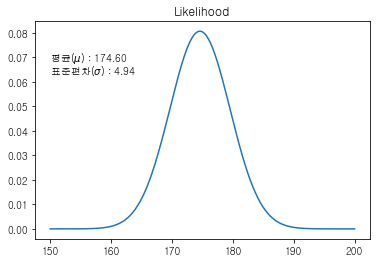

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

plt.rcParams["font.family"] = "gulim"

# 주어진 데이터 x
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# 평균 및 표준편차 구하기
mu = np.mean(heights)   # 174.6
sigma = np.std(heights) # 4.94

# Likelihood 수식, 여기서 x는 그림을 그리기 위한 단순한 변수입니다.
# Likelihood 수식은 scipy.stats.norm.pdf(x, mu, sigma)로 사용할 수도 있습니다.
x = np.linspace(150, 200, 500)
likelihood = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-1 * (x-mu)**2 / (2*sigma**2))

plt.figure()
plt.title("Likelihood")
plt.plot(x, likelihood)
plt.text(150, 0.07, f"평균($\mu$) : {mu:.2f}", va="center")
plt.text(150, 0.065, f"표준편차($\sigma$) : {sigma:.2f}", va="center")
plt.show()

위에서 Likelihood에 따른 분포를 보았으니 한개의 height의 Likelihood를 계산해보겠습니다.

*참고 : Reference와 숫자가 다른데, Reference에서는 보기 쉽게 숫자를 평균, 표준편차를 반올림하였습니다.*

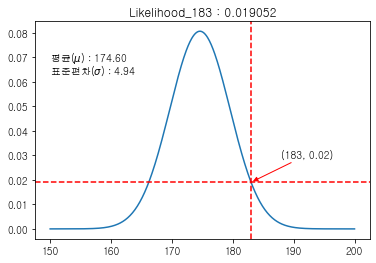

In [2]:
# heights에 있는 첫번째 변수 (첫번째 키)
height_183 = 183 

# 계산된 분포 N(mu, sigma)에서 183이 발생할 확률
likelihood_183 = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-1 * (height_183-mu)**2 / (2*sigma**2))

plt.figure()
plt.title(f"Likelihood_183 : {likelihood_183:.6f}")
plt.plot(x, likelihood)
plt.axvline(x=height_183, c="red", ls="--")
plt.axhline(y=likelihood_183, c="red", ls="--")
arrowprops = dict(color='red',arrowstyle="-|>")
plt.annotate(f"({height_183:.0f}, {likelihood_183:.2f})", (height_183, likelihood_183), (height_183+5, likelihood_183+0.01), arrowprops=arrowprops)
plt.text(150, 0.07, f"평균($\mu$) : {mu:.2f}", va="center")
plt.text(150, 0.065, f"표준편차($\sigma$) : {sigma:.2f}", va="center")
plt.show()

위 방법을 동원하면 heights의 모든 likelihood 값을 얻을 수 있습니다.

In [3]:
likelihood = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-1 * (heights-mu)**2 / (2*sigma**2))

for h, l in zip(heights, likelihood):
    print(f"Height : {h} => likelihood : {l:.6f}")

Height : 183 => likelihood : 0.019052
Height : 168 => likelihood : 0.033100
Height : 177 => likelihood : 0.071727
Height : 170 => likelihood : 0.052343
Height : 175 => likelihood : 0.080434
Height : 177 => likelihood : 0.071727
Height : 178 => likelihood : 0.063702
Height : 166 => likelihood : 0.017772
Height : 174 => likelihood : 0.080105
Height : 178 => likelihood : 0.063702


## 5. Prior

데이터를 관찰하기 전에 알고 있는 확률입니다. 베이지안 추론에서 가장 주관적인 부분이며 다른 접근법을 사용할 수 있습니다.

이번 예제에서는 전세계 평균 키(165)와 표준 편차(7)를 사전 분포(Prior)로 설정합니다. 당연히 1000명의 사람들의 분포와 다소 다를 수 있으나, 사전 분포로써 충분할 것입니다. 다만, 이렇게 상정하는 것도 상당히 개입이 많이 된 것이니 임의로 표준 편차를 2배로 적용하였습니다.

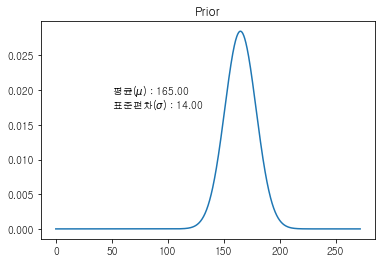

In [4]:
# Prior를 위한 평균 및 표준편차 설정
mu_world = 165
sigma_world = 7 * 2 # 임의로 노이즈를 추가

# prior 수식, 여기서 x는 그림을 그리기 위한 단순한 변수입니다.
# prior 수식은 scipy.stats.norm.pdf(x, mu, sigma)로 사용할 수도 있습니다.
x = np.linspace(0, 272, 1000) # 사람의 키가 272까지 관측된적이 있다고 합니다.
prior = 1 / np.sqrt(2 * np.pi * sigma_world**2) * np.exp(-1 * (x-mu_world)**2 / (2*sigma_world**2))

plt.figure()
plt.title("Prior")
plt.plot(x, prior)
plt.text(50, 0.02, f"평균($\mu$) : {mu_world:.2f}", va="center")
plt.text(50, 0.018, f"표준편차($\sigma$) : {sigma_world:.2f}", va="center")
plt.show()

위에서 Prior에 따른 분포를 보았으니 한개의 height의 Prior를 계산해보겠습니다.

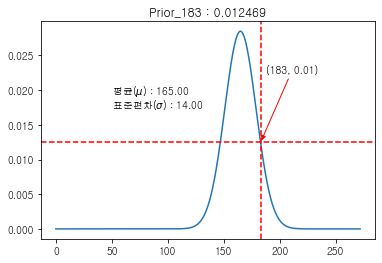

In [5]:
# heights에 있는 첫번째 변수 (첫번째 키)
height_183 = 183 

# 계산된 분포 N(mu, sigma)에서 183이 발생할 확률
prior_183 = 1 / np.sqrt(2 * np.pi * sigma_world**2) * np.exp(-1 * (height_183-mu_world)**2 / (2*sigma_world**2))

plt.figure()
plt.title(f"Prior_183 : {prior_183:.6f}")
plt.plot(x, prior)
plt.axvline(x=height_183, c="red", ls="--")
plt.axhline(y=prior_183, c="red", ls="--")
arrowprops = dict(color='red',arrowstyle="-|>")
plt.annotate(f"({height_183:.0f}, {prior_183:.2f})", (height_183, prior_183), (height_183+5, prior_183+0.01), arrowprops=arrowprops)
plt.text(50, 0.02, f"평균($\mu$) : {mu_world:.2f}", va="center")
plt.text(50, 0.018, f"표준편차($\sigma$) : {sigma_world:.2f}", va="center")
plt.show()

위 방법을 동원하면 heights의 모든 prior 값을 얻을 수 있습니다.

In [6]:
prior = 1 / np.sqrt(2 * np.pi * sigma_world**2) * np.exp(-1 * (heights-mu_world)**2 / (2*sigma_world**2))

for h, p in zip(heights, prior):
    print(f"Height : {h} => Prior : {p:.6f}")

Height : 183 => Prior : 0.012469
Height : 168 => Prior : 0.027849
Height : 177 => Prior : 0.019735
Height : 170 => Prior : 0.026735
Height : 175 => Prior : 0.022080
Height : 177 => Prior : 0.019735
Height : 178 => Prior : 0.018516
Height : 166 => Prior : 0.028423
Height : 174 => Prior : 0.023176
Height : 178 => Prior : 0.018516


## 6. Evidence

Evidence는 데이터의 확률로써 다음과 같은 수식으로 계산할 수 있습니다. 

$$
P(x)=\int_{-\infty}^{\infty} P(x|\theta)\cdot d\theta
$$

다만, 이번 사례에선 정규분포를 따른다고 가정하였으니 아래와 같은 수식으로 변형이 가능합니다.

$$
P(x)=\int_{0}^{272} P(x|\mu)\cdot d\mu
$$

$P(x|\mu)$는 Likelihood 값이므로, $P(x)$는 Likelihood 값들의 합으로 생각할 수 있습니다. 이번 사례에선 구한 Likelihood 값들이 0.019, ..., 0.063 이므로 약 0.55입니다.

## 7. Posterior

다시 Posterior 수식을 가져와보겠습니다.

$$P(\theta|x)=\frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

위에서 Likelihood, Prior, Evidence 를 전부 구했습니다. 하지만 매개변수 $\theta$가 변경되더라도 Evidence는 동일하기 때문에 상수처리하고 계산을 하지 않아도 원하는 형태의 데이터는 얻을 수 있습니다.

$$P(\theta|x) \propto P(x|\theta) \cdot P(\theta)$$

전체적으로 수식을 재작성 해보겠습니다.

In [7]:
# 주어진 데이터 x
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# Likelihood를 위해 주어진 데이터에서 평균 및 표준편차 구하기
mu = np.mean(heights)   # 174.6
sigma = np.std(heights) # 4.94

# Prior를 위해 평균 및 표준편차 설정
mu_world = 165
sigma_world = 7 * 2 # 임의로 노이즈를 추가

# heights에 있는 첫번째 변수 (첫번째 키)
height_183 = 183 

# 직접 수식 작성에서 scipy.stats.norm.pdf() 함수를 사용하였습니다.
likelihoods = scipy.stats.norm.pdf(heights, mu, sigma)
prior_183 = scipy.stats.norm.pdf(height_183, mu_world, sigma_world)

# likelihoods를 전부 곱하는 이유는 데이터 분포에서 이렇게 데이터가 나올 확률을 구해야하기 때문입니다.
posterior_183 = prior_183 * np.prod(likelihoods)

posterior_183

9.838900915792458e-16

## 8. Grid based Bayesian inference

최적의 매개변수를 찾는데 가장 쉬운 방식은 모든 조합의 값을 계산하는 방법입니다.
원래 매개변수는 $\theta$이겠으나, 정규분포를 사용한다고 했으니 $\mu$와 $\sigma$입니다.

일단 평균 $\mu$를 구해보겠습니다.

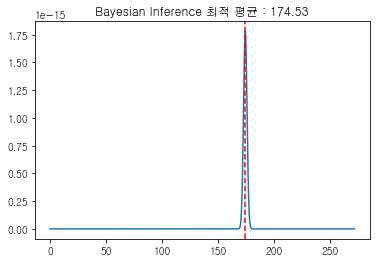

In [8]:
# 주어진 데이터 x
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# 평균 mu의 최적값을 구하고자 하므로 여기에 mu는 제외합니다.
# mu = np.mean(heights)   # 
sigma = np.std(heights) # 4.94

# Prior를 위해 평균 및 표준편차 설정
mu_world = 165
sigma_world = 7 * 2 # 임의로 노이즈를 추가

# 베이즈 정리
# mu_candidates로 숫자를 넣어가며 mu를 찾는 방식
mu_candidates = np.linspace(0., 272, 1000)
posteriors = []

for mu_candidate in mu_candidates:
    likelihoods = scipy.stats.norm.pdf(heights, mu_candidate, sigma)
    prior = scipy.stats.norm.pdf(mu_candidate, mu_world, sigma_world)
    posterior = prior * np.prod(likelihoods)
    posteriors.append(posterior)
    
# Bayesian inference 결과
mu_choice = mu_candidates[np.argmax(posteriors)]

# Plot
plt.figure()
plt.plot(mu_candidates, posteriors)
plt.axvline(x=mu_choice, color="red", ls="--")
plt.title(f"Bayesian Inference 최적 평균 : {mu_choice:.2f}")
plt.show()

표준편차 $\sigma$를 구해보겠습니다.

하지만 알아두어야할 것이 있습니다. 평균 $\mu$의 경우엔 산포가 정규분포를 이룬다고 가정할 수 있습니다만 표준편차 $\sigma$의 경우엔 어떠한 산포를 이루었는지 알 수가 없습니다. 그러므로 정보가 없는 균일한 pdf를 적용하였습니다.

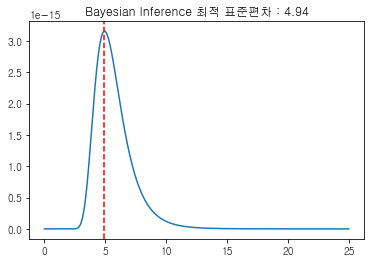

In [9]:
# 주어진 데이터 x
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# 표준편차 sigma의 최적값을 구하고자 하므로 여기에 sigma는 제외합니다.
mu = np.mean(heights)
# sigma = np.std(heights)

# sigma의 prior 를 구하기 위해 최대, 최소값은 설정해둡니다.
sigma_min = 0.01
sigma_max = 25.0

# 베이즈 정리
# mu_candidates로 숫자를 넣어가며 mu를 찾는 방식
sigma_candidates = np.linspace(sigma_min, sigma_max, 1000)
posteriors = []

for sigma_candidate in sigma_candidates:
    likelihoods = scipy.stats.norm.pdf(heights, mu, sigma_candidate)
    # 정보가 없는 prior를 구할 때 쓰는 방법, 하단에 추가 정보를 기재합니다.
    prior = scipy.stats.uniform.pdf(sigma_candidate, sigma_min, sigma_max)
    posterior = prior * np.prod(likelihoods)
    posteriors.append(posterior)
    
# Bayesian inference 결과
sigma_choice = sigma_candidates[np.argmax(posteriors)]

# Plot
plt.figure()
plt.plot(sigma_candidates, posteriors)
plt.axvline(x=sigma_choice, color="red", ls="--")
plt.title(f"Bayesian Inference 최적 표준편차 : {sigma_choice:.2f}")
plt.show()

$\mu$, $\sigma$를 각각 구할때 최적의 값을 구할 수 있다고 생각할 수 없습니다. 그러므로 동시에 구하는 방법을 소개합니다.

100%|██████████| 1000/1000 [04:35<00:00,  3.63it/s]


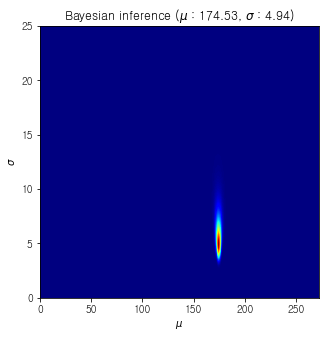

In [10]:
# 주어진 데이터
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# mu_prior를 위해 평균 및 표준편차 설정
mu_world = 165
sigma_world = 7 * 2 # 임의로 노이즈를 추가

# 후보군 선정
MU_MIN = 0.0
MU_MAX = 272.0
SIGMA_MIN = 0.01
SIGMA_MAX = 25.0

mu_candidates = np.linspace(MU_MIN, MU_MAX, 1000)
sigma_candidates = np.linspace(SIGMA_MIN, SIGMA_MAX, 1000)

# Grid based Bayesian inference
rows = []
for mu_candidate in tqdm(mu_candidates):
    for sigma_candidate in sigma_candidates:
        
        likelihoods = scipy.stats.norm.pdf(heights, mu_candidate, sigma_candidate)
        
        mu_prior = scipy.stats.norm.pdf(mu_candidate, mu_world, sigma_world)
        sigma_prior = scipy.stats.uniform.pdf(sigma_candidate, SIGMA_MIN, SIGMA_MAX)
        
        posterior = mu_prior * sigma_prior * np.prod(likelihoods)
        
        rows.append({
            "mu": mu_candidate,
            "sigma": sigma_candidate,
            "posterior": posterior,
        })

# 데이터 처리 및 Plot
df = pd.DataFrame(rows)
mat = df.pivot(index="sigma", columns="mu", values="posterior")

mu_choice = df.at[np.argmax(df["posterior"]), "mu"]
sigma_choice = df.at[np.argmax(df["posterior"]), "sigma"]

plt.figure(figsize=(5, 5))
plt.pcolormesh(mat.columns, mat.index, mat.values, cmap="jet")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title(f"Bayesian inference ($\mu$ : {mu_choice:.2f}, $\sigma$ : {sigma_choice:.2f})")
plt.show()

## 9. Sampling

구한 평균 $\mu$ 값과 표준편차 $\sigma$ 값을 기반으로 원래 문제였던 1,000명을 샘플링하여 도식화 해보겠습니다.

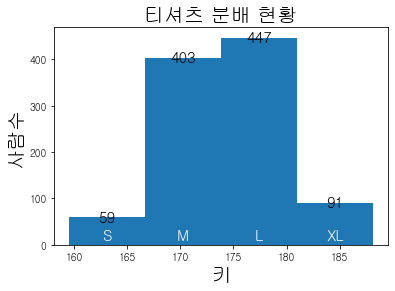

In [11]:
mu_target = 174.53
sigma_target = 4.94

labels = ["S", "M", "L", "XL"]

np.random.seed(0)
heights_1000 = np.random.normal(mu_target, sigma_target, 1000)

plt.figure()
y, x, _ = plt.hist(heights_1000, bins=len(labels))

for i, label in enumerate(labels):    
    plt.text(np.mean(x[i:i+2]), 20, label, va="center", ha="center", c="w", size=15)
    plt.text(np.mean(x[i:i+2]), y[i], f"{y[i]:.0f}", va="center", ha="center", size=15)

plt.xlabel("키", size=20)
plt.ylabel("사람수", size=20)
plt.title("티셔츠 분배 현황", size=20)
plt.show()

## 10. Tip 1, Prior 자체가 없을 때 (처음 추론할때)

Grid based Bayesian inference 섹션에서 이미 언급된바 있긴한데, uniform을 적용하면됩니다.

예를들어, 사람의 키가 0 ~ 272까지가 있다고 합니다. 이 분포는 알수가 없습니다. 그러므로 모두 같은 분포라고 가정합니다. (즉, 모든 값들은 같은 가능성이 있는겁니다.)

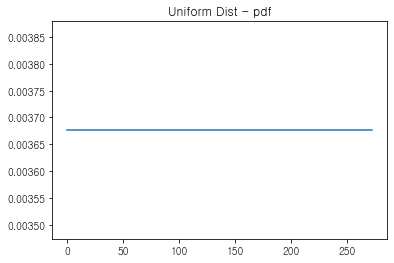

In [12]:
height_min = 0
height_max = 272

# 여기서 x는 단순히 pdf 함수를 그리기 위한 숫자입니다.
# y 수식은 scipy.stats.uniform.pdf(x, height_min, height_max) 로 대체가 가능합니다.
x = np.linspace(height_min, height_max, 1000)
y = np.array([1 / (height_max - height_min)] * len(x))

plt.figure()
plt.plot(x, y)
plt.title("Uniform Dist - pdf")
plt.show()

Grid based Bayesian inference 섹션에서 구현하였던 평균 $\mu$ 버젼을 상기하셔서 사전 정보가 없을 때 Bayesian inference는 다음과 같이 구현됩니다.

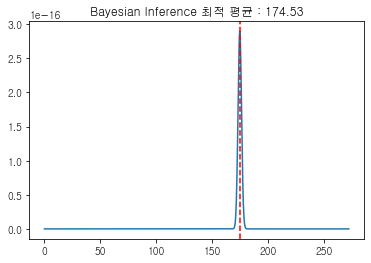

In [13]:
# 주어진 데이터 x
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# 평균 mu의 최적값을 구하고자 하므로 여기에 mu는 제외합니다.
# mu = np.mean(heights) # 
sigma = np.std(heights) # 4.94

# Prior를 모르니 uniform 사용하기 위한 최대최소값 설정
height_min = 0
height_max = 272

# 베이즈 정리
# mu_candidates로 숫자를 넣어가며 mu를 찾는 방식
mu_candidates = np.linspace(height_min, height_max, 1000)
posteriors = []

for mu_candidate in mu_candidates:
    likelihoods = scipy.stats.norm.pdf(heights, mu_candidate, sigma)
    prior = scipy.stats.uniform.pdf(mu_candidate, height_min, height_max)
    posterior = prior * np.prod(likelihoods)
    posteriors.append(posterior)
    
# Bayesian inference 결과
mu_choice = mu_candidates[np.argmax(posteriors)]

# Plot
plt.figure()
plt.plot(mu_candidates, posteriors)
plt.axvline(x=mu_choice, color="red", ls="--")
plt.title(f"Bayesian Inference 최적 평균 : {mu_choice:.2f}")
plt.show()

단, 여기서 이전에 uniform을 하지 않은 수식과 값이 같은 이유는 sigma_world 변수가 너무 커서 계산상 큰 차이가 없기 때문입니다.

## 11. Tip 2, 계산 속도 향상

컴퓨터는 곱하기 연산보다 더하기 연산이 빠르며, 곱하기가 중첩된 경우 유효숫자의 반올림처리 문제로 정상적인 계산결과를 얻을 수 없습니다. Bayesian inference의 경우 매우 작은 숫자를 다루기 때문에 상기한 문제를 해결 할 방안을 마련해야합니다.

$$\log(xy) = \log(x) + \log(y)$$

간단한 트릭으로 곱하기를 $\log$ 치환하면 더하기로 변환할 수 있습니다. 이 부분을 한번 확인해보겠습니다.

In [14]:
import time

numbers = np.random.random(100_000_000)

begin1 = time.perf_counter()
np.prod(numbers)
end1 = time.perf_counter()

begin2 = time.perf_counter()
np.exp(np.sum(np.log(numbers)))
end2 = time.perf_counter()

result1 = end1-begin1
result2 = end2-begin2

print(f"곱하기 연산 : {result1:.6f}, 치환 연산 : {result2:.6f}")


곱하기 연산 : 0.086162, 치환 연산 : 0.969586


실제로 log 연산이 빠를 것 같지만, CPU에 따라(?), 혹은 상황에 따라(?) 상당히 상이합니다. 그래도 Reference에서 소개하였으므로 저도 소개까지만 해놓습니다.

여기서 마지막에 heatmap을 구하려고 하는 것이 아니라면, `np.exp` 연산을 하지 않아도 됩니다.

100%|██████████| 1000/1000 [05:01<00:00,  3.31it/s]


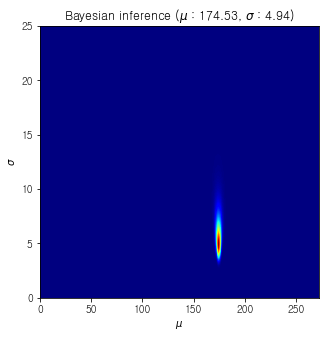

In [15]:
# 주어진 데이터
heights = np.array([183, 168, 177, 170, 175, 177, 178, 166, 174, 178])

# mu_prior를 위해 평균 및 표준편차 설정
mu_world = 165
sigma_world = 7 * 2 # 임의로 노이즈를 추가

# 후보군 선정
MU_MIN = 0.0
MU_MAX = 272.0
SIGMA_MIN = 0.01
SIGMA_MAX = 25.0

mu_candidates = np.linspace(MU_MIN, MU_MAX, 1000)
sigma_candidates = np.linspace(SIGMA_MIN, SIGMA_MAX, 1000)

# Grid based Bayesian inference
rows = []
for mu_candidate in tqdm(mu_candidates):
    for sigma_candidate in sigma_candidates:
        
        likelihoods = scipy.stats.norm.logpdf(heights, mu_candidate, sigma_candidate)
        
        mu_prior = scipy.stats.norm.logpdf(mu_candidate, mu_world, sigma_world)
        sigma_prior = scipy.stats.uniform.logpdf(sigma_candidate, SIGMA_MIN, SIGMA_MAX)
        
        posterior = mu_prior + sigma_prior + np.sum(likelihoods)
        
        rows.append({
            "mu": mu_candidate,
            "sigma": sigma_candidate,
            "posterior": posterior,
        })

# 데이터 처리 및 Plot
df = pd.DataFrame(rows)
mat = df.pivot(index="sigma", columns="mu", values="posterior")

mu_choice = df.at[np.argmax(df["posterior"]), "mu"]
sigma_choice = df.at[np.argmax(df["posterior"]), "sigma"]

plt.figure(figsize=(5, 5))
plt.pcolormesh(mat.columns, mat.index, np.exp(mat.values), cmap="jet")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title(f"Bayesian inference ($\mu$ : {mu_choice:.2f}, $\sigma$ : {sigma_choice:.2f})")
plt.show()